# 最小二乗法の適用例
* $x$と$y$は本質的には線形関係を持っている（$y=ax+b$）．しかし，$x$に対する$y$の値を計測する時に必ず誤差が生じる．
* $(x,y)=(1,2),(2,4),(3,5),(4,7)$の観測が得られた際に，最小二乗法にもとづいて $a, b$ を求めよ．


## 解法１
$y = ax + b = w^T x$と表す。ここで$w = \begin{pmatrix}a \\ b \end{pmatrix}$ である（つまり、$w^T = (a \ b)$。

問題設定から$\boldsymbol{x}= \begin{pmatrix}1  \\ 2 \\ 3 \\ 4\end{pmatrix}$ 　$\boldsymbol{y}= \begin{pmatrix}2 \\4 \\5 \\7\end{pmatrix}$

教科書p.153の(11.11)$\frac{\partial E}{\partial w_j} = -2 \sum_i x_{i,j}(y_i - {w^*}^T x_i)$ を解いてみる。

$E(w) = \sum_i(y_i - w^Tx_i)^T(y^i - w^Tx_i)$に問題の設定を代入すると
$E(w) = (2-(a+b)*1)^2 + (4-(2a+b))^2 + (5-(3a+b))^2 + (7-(4a+b))^2$ であり、
これを最小とする $w^T=(a, b)$を求める

$\frac{\partial E}{\partial a} =-2(2-a-b) - 4(4-2a-b) -6(5-3a-b) - 8(7-4a-b) = 60a + 20b - 106$<BR>
   極値では $= 0$ となるので $30a + 10b = 53$<BR>

$\frac{\partial E}{\partial b} =-2(2-a-b) - 2(4-2a-b) -2(5-3a-b) - 2(7-4a-b) = 20a + 8b - 36 = 0$        <BR>
  書き換えれば  $5a + 2b = 9$
 
この２つの式を解いて$a,b$の値を求める：   $a = 1.6,   b = 0.5$

## 解法２
教科書 p.153 の(11.15)を用いる。問題設定は解法1と同じである。
ただこのままだと値がスカラーなので、ダミーの定数をいれてベクトルとする。
つまり $X = \begin{pmatrix}1 & 1 & 1 & 1\\ 1 & 2 & 3 & 4\end{pmatrix}, y=\begin{pmatrix} 1 & 1 & 1 & 1\\ 2 & 4 & 5 & 7\end{pmatrix}$と表す。

In [25]:
import numpy as np
X=np.array([[1,1],[1,2],[1,3],[1,4]]).T
y=np.array([[1,2],[1,4],[1,5],[1,7]])


In [34]:
print(X)
print(y)

[[1 1 1 1]
 [1 2 3 4]]
[[1 1 1 1]
 [2 4 5 7]]


In [36]:
XX= X.dot(X.T)
XX

array([[ 4, 10],
       [10, 30]])

In [37]:
XX_inv=np.linalg.inv(XX)
XX_inv

array([[ 1.5, -0.5],
       [-0.5,  0.2]])

In [38]:
Xy = X.dot(y.T)
Xy

array([[ 4, 18],
       [10, 53]])

In [39]:
w_ast=XX_inv.dot(Xy)

In [40]:
w_ast

array([[1. , 0.5],
       [0. , 1.6]])

In [41]:
w_ast.T.dot(X)

array([[1. , 1. , 1. , 1. ],
       [2.1, 3.7, 5.3, 6.9]])

## 解法3: scikit-learn

In [2]:
# scikit-learnを用いる
import numpy as np
from sklearn.linear_model import LinearRegression
X=np.array([[x+1] for x in range(4)])
y=np.array([2,4,5,7])
model=LinearRegression()
model.fit(X,y)
print("slope="  ,model.coef_[0], "intercept= ", model.intercept_)


slope= 1.6000000000000003 intercept=  0.4999999999999991


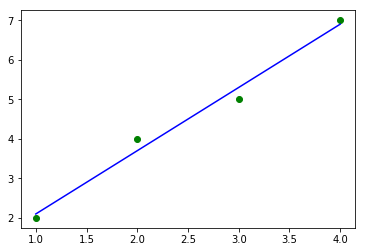

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
a=model.coef_[0]
b=model.intercept_
plt.plot(X,y,"go")
plt.plot(X,[a*x + b for x in X], "b-")

In [4]:
[]

[(array([1]), 2), (array([2]), 4), (array([3]), 5), (array([4]), 7)]

## 解法4
金谷(2003)『これなら分かる応用数学教室』 共立

から、データを $(x_i,y_i)$として(この例では$i=1,2,3,4$)当てはめる直線を $y=ax+b$ とすると、
正規方程式は

$\begin{pmatrix} \sum^4_{i=1}x_i^2 & \sum^4_{i=1}x_i\\ \sum^4_{i=1}x_i & \sum^4_{i=1}1 \\ \end{pmatrix}  \begin{pmatrix} a\\ b \\  \end{pmatrix} = \begin{pmatrix} \sum^4_{i=1}x_i y_i \\ \sum^4_{i=1}y_i \\  \end{pmatrix}$

これから
$\begin{pmatrix} a\\ b \\  \end{pmatrix} = \begin{pmatrix} \sum^4_{i=1}x_i^2 & \sum^4_{i=1}x_i\\
   \sum^4_{i=1}x_i & \sum^4_{i=1}1 \\ \end{pmatrix}^{-1}
   \begin{pmatrix} \sum^4_{i=1}x_i y_i \\ \sum^4_{i=1}y_i \\  \end{pmatrix} $

In [27]:
import numpy as np
X=np.array([x+1 for x in range(4)])
y=np.array([2,4,5,7])
M = np.array( [[np.sum(X**2), np.sum(X)], [np.sum(X), 4] ])
M

array([[30, 10],
       [10,  4]])

In [28]:

B=np.array([np.sum(x.dot(y)), np.sum(y)])
B

array([53, 18])

In [29]:
M.T

array([[30, 10],
       [10,  4]])

In [30]:
np.linalg.inv(M.T)

array([[ 0.2, -0.5],
       [-0.5,  1.5]])

In [31]:
np.linalg.inv(M.T).dot(B)

array([1.6, 0.5])

In [32]:
a,b=np.linalg.inv(M.T).dot(B)

In [33]:
print("slope="  ,a, "intercept= ", b)

slope= 1.5999999999999979 intercept=  0.5
